# Example of Mapping visualization.
This map is published in my paper at: https://www.sciencedirect.com/science/article/pii/S0273117720308346

In [1]:
import numpy as np        
import matplotlib.pyplot as plt 
from matplotlib import cm
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from astropy.time import Time
from datetime import datetime

In [2]:
# Definition of functions for dates managment

def ymd(a,b,c):
    t = Time(datetime(a,b,c,0,0,0))
    return t.decimalyear
def mjdtodate(s):
    t=Time(s ,format='mjd')
    return t.decimalyear


# coordinates transfromation --> X,Y,Z to North, East, Up.
def datetomjd(s):
    t=Time(s ,format='decimalyear')
    return t.mjd

def NEU(X,Y,Z):
    east=-np.sin(l)*(X)+np.cos(l)*(Y)
    north = -np.sin(p)*np.cos(l)*(X)-np.sin(p)*np.sin(l)*(Y)+np.cos(p)*(Z)
    up = np.cos(p)*np.cos(l)*(X) +np.cos(p)*np.sin(l)*(Y) +np.sin(p)*(Z)
    return north, east ,up

# Interpolation function, in order to "match" the same points to easy calculate the difference between two time series

def interpol(mjd,X,Y,Z,mjd_final):
    interX =interp1d(mjd,X,bounds_error = False)
    new_X = interX(mjd_final)
    interY = interp1d(mjd,Y,bounds_error = False)
    new_Y = interY(mjd_final)
    interZ = interp1d(mjd,Z,bounds_error = False)
    new_Z = interZ(mjd_final)
    return new_X,new_Y,new_Z

def RMS(X):
    return np.sqrt(np.mean(X**2))

In [3]:
sta = np.loadtxt('../data/list_sta.txt',usecols=(0,),dtype=str) 
sta_code = np.loadtxt('../data/list_sta.txt',usecols=(1,),dtype=str) 
pp = np.loadtxt('../data/list_sta.txt',usecols=(2,)) #latitue
ll = np.loadtxt('../data/list_sta.txt',usecols=(3,)) #longitude    

h = 0
#tranlating the longitute to fit the map
ll2 = ([0]*len(ll))
while h< len(ll):
    if ll[h] >= 180.:
        ll2[h] = ll[h]-360.
    else:
        ll2[h] = ll[h]
    h=h+1   
file_data_multi = 'arcs_multi'
arc_all = np.loadtxt(file_data_multi,dtype='str',usecols=(0,))
station = np.loadtxt(file_data_multi,dtype='str',usecols=(1,))

week = np.unique(arc_all)

station_code = ([0]*len(arc_all))

i = 0
while i <= len(arc_all)-1:
    station_code[i] = station[i][3:10]
    i = i+1
    
indice = np.loadtxt(file_data_multi,usecols=(2,))
list_sta = np.unique(station_code)

wherex = np.where(indice == 21)    
station_code = np.array(station_code)[wherex]

arc_all = np.loadtxt(file_data_multi,dtype='str',usecols=(0,))
#station = np.loadtxt(file_data_multi,dtype='str',usecols=(1,))
week = np.unique(arc_all)

carte1=np.loadtxt("Carte_Continents.dat",usecols=(0,))
carte2=np.loadtxt("Carte_Continents.dat",usecols=(1,))
longi_arr = range(-180,180)
lati_arr = range(-90,90)
XX,YY = np.meshgrid(longi_arr,lati_arr)
i = 0

date = ([0]* len(week))
m = 0
while m <= len(week)-1:
    date[m] = ymd(int(week[m][0:4]),int(week[m][4:6]),int(week[m][6:8]))
    m = m+1
MJDdate = datetomjd(date)
MJDdate = np.around(MJDdate)


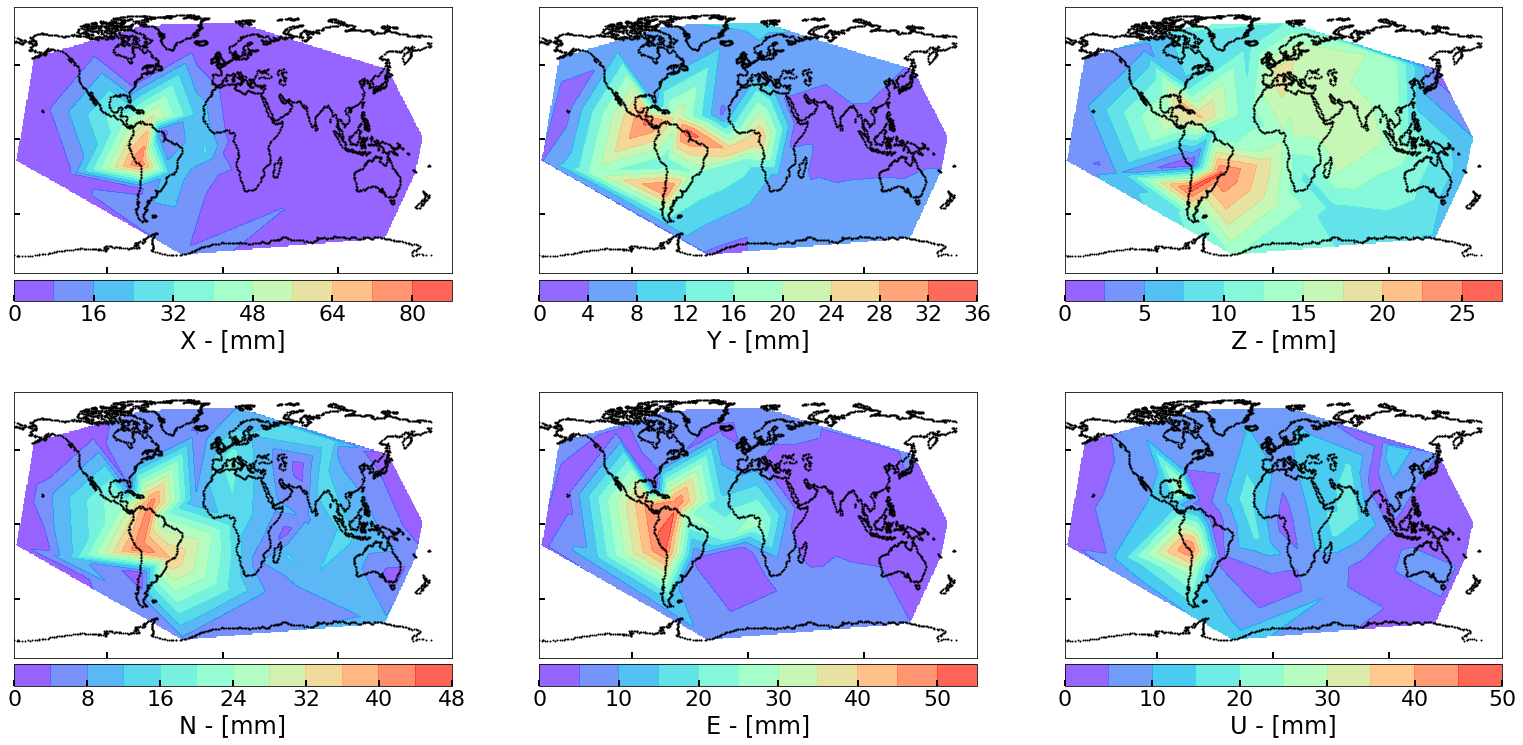

In [4]:
plt.rcParams['figure.figsize'] = [20, 10]


file = 'NEWcarte_j2.txt'
pp3 = np.loadtxt(file,usecols=(1,))
ll4 = np.loadtxt(file,usecols=(2,))




diffX2 = np.loadtxt(file,usecols=(3,))

    
diffY2 = np.loadtxt(file,usecols=(4,))
diffZ2 = np.loadtxt(file,usecols=(5,))
diffN2 = np.loadtxt(file,usecols=(6,))
diffE2 = np.loadtxt(file,usecols=(7,))
diffU2 = np.loadtxt(file,usecols=(8,))

h = 0
ll3 = ([0]*len(ll4))
while h< len(ll4):
    if ll4[h] >= 180.:
        ll3[h] = ll4[h]-360.
    else:
        ll3[h] = ll4[h]
    h=h+1   
a = 2560/96
b = 1246/96
fig = plt.figure(4,figsize=(a,b))

ax = fig.add_subplot(2,3,1)

Z1 = griddata((ll3,pp3),abs(diffX2),(XX,YY),method = 'linear')
#N = North component, E = East and U = Up


ax.plot(carte1,carte2,'k.',ms=2)
cs = ax.contourf(XX, YY, Z1,10, alpha=0.7, cmap=cm.rainbow,linestyles='None')
cbar = fig.colorbar(cs,orientation="horizontal",pad=0.02)
cbar.ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22)
ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22,labelbottom=False,labelleft=False)
cbar.set_label('X - [mm]',fontsize=24)

ax = fig.add_subplot(2,3,2)
Z1 = griddata((ll3,pp3),abs(diffY2),(XX,YY),method = 'linear')
ax.plot(carte1,carte2,'k.',ms=2)
cs = ax.contourf(XX, YY, Z1,10, alpha=0.7, cmap=cm.rainbow,linestyles='None')
cbar = fig.colorbar(cs,orientation="horizontal",pad=0.02)
cbar.ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22)
ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22,labelbottom=False,labelleft=False)
cbar.set_label('Y - [mm]',fontsize=24)


ax= fig.add_subplot(2,3,3)

Z1 = griddata((ll3,pp3),abs(diffZ2),(XX,YY),method = 'linear')

ax.plot(carte1,carte2,'k.',ms=2)
cs = ax.contourf(XX, YY, Z1,10, alpha=0.7, cmap=cm.rainbow,linestyles='None')
cbar = fig.colorbar(cs,orientation="horizontal",pad=0.02)
cbar.ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22)
ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22,labelbottom=False,labelleft=False)
cbar.set_label('Z - [mm]',fontsize=24)





ax = fig.add_subplot(2,3,4)
Z1 = griddata((ll3,pp3),abs(diffN2),(XX,YY),method = 'linear')

ax.plot(carte1,carte2,'k.',ms=2)
cs = ax.contourf(XX, YY, Z1,10, alpha=0.7, cmap=cm.rainbow,linestyles='None')
cbar = fig.colorbar(cs,orientation="horizontal",pad=0.02)
cbar.ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22)
ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22,labelbottom=False,labelleft=False)
cbar.set_label('N - [mm]',fontsize=24)


ax = fig.add_subplot(2,3,5)
Z1 = griddata((ll3,pp3),abs(diffE2),(XX,YY),method = 'linear')

ax.plot(carte1,carte2,'k.',ms=2)
cs = ax.contourf(XX, YY, Z1,10, alpha=0.7, cmap=cm.rainbow,linestyles='None')
cbar = fig.colorbar(cs,orientation="horizontal",pad=0.02)
cbar.ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22)
ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22,labelbottom=False,labelleft=False)
cbar.set_label('E - [mm]',fontsize=24)
ax = fig.add_subplot(2,3,6)
Z1 = griddata((ll3,pp3),abs(diffU2),(XX,YY),method = 'linear')

ax.plot(carte1,carte2,'k.',ms=2)
cs = ax.contourf(XX, YY, Z1,10, alpha=0.7, cmap=cm.rainbow,linestyles='None')
cbar = fig.colorbar(cs,orientation="horizontal",pad=0.02)
cbar.ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22)
ax.tick_params(direction='in', length=6, width=2, colors='k',labelsize = 22,labelbottom=False,labelleft=False)
cbar.set_label('U - [mm]',fontsize=24)